In [1]:
#First we need to import the pandas library
import pandas as pd

#Load our lung cancer dataset into object ds
ds = pd.read_csv('/Users/haydenwhite/Documents/USC Upstate/599 Senior Seminar/src/survey_lung_cancer.csv')

#Lets first print the number of rows and columns of the dataset
print('Size of dataset', ds.shape)
#Lets verify our filepath is correct by previewing the data with the following head() method call
ds.head()

#If we had any cells with N/A, we can remove those rows with: ds = ds.dropna()

Size of dataset (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
#Now we need to make some adjustments to the data
#Lets start by replacing all the '1s' with 0 and all the '2s' with 1
#Note: 'FATIGUE ' and 'ALLERGY ' have an extra whitespace at the end of their string
ds['SMOKING'].replace({1: 0, 2: 1}, inplace = True)
ds['YELLOW_FINGERS'].replace({1: 0, 2: 1}, inplace = True)
ds['SMOKING'].replace({1: 0, 2: 1}, inplace = True)
ds['ANXIETY'].replace({1: 0, 2: 1}, inplace = True)
ds['PEER_PRESSURE'].replace({1: 0, 2: 1}, inplace = True)
ds['CHRONIC DISEASE'].replace({1: 0, 2: 1}, inplace = True)
ds['FATIGUE '].replace({1: 0, 2: 1}, inplace = True)
ds['ALLERGY '].replace({1: 0, 2: 1}, inplace = True)
ds['WHEEZING'].replace({1: 0, 2: 1}, inplace = True)
ds['ALCOHOL CONSUMING'].replace({1: 0, 2: 1}, inplace = True)
ds['COUGHING'].replace({1: 0, 2: 1}, inplace = True)
ds['SHORTNESS OF BREATH'].replace({1: 0, 2: 1}, inplace = True)
ds['SWALLOWING DIFFICULTY'].replace({1: 0, 2: 1}, inplace = True)
ds['CHEST PAIN'].replace({1: 0, 2: 1}, inplace = True)

#Now lets replace the 'YES' and 'NO' values in the 'LUNG_CANCER' column with '1' and '0' respectively
ds['LUNG_CANCER'].replace({'NO': 0, 'YES': 1}, inplace = True)

#For debugging purposes, lets replace 'M' with 1 and 'F' with 0 for the GENDER column
ds['GENDER'].replace({'F': 0, 'M': 1}, inplace = True)

ds.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,0,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,0,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
#Now lets convert our dataset into an array that the machine can process
dataset = ds.values

#We can view this dataset by simply writing "dataset"
dataset

array([[ 1, 69,  0, ...,  1,  1,  1],
       [ 1, 74,  0, ...,  1,  1,  1],
       [ 0, 59,  0, ...,  0,  1,  0],
       ...,
       [ 1, 58,  0, ...,  0,  1,  1],
       [ 1, 67,  0, ...,  0,  1,  1],
       [ 1, 62,  0, ...,  1,  0,  1]])

In [4]:
#Now we need to split our dataset so that the input features (first 15 columns) are stored in X and 
#the output feature (column 16) is stored in Y
X = dataset[:,0:15] #Storing columns 1-15 in X
Y = dataset[:,15]   #Storing column 16 in Y

#Luckily, the vast majority  of our data is binary (either a 0 or 1) EXCEPT for the Age column
#We need to scale the age column so that it lies between 0 or 1 inclusive
#We do this by importing the processing module from sklearn
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() #Creating the preprocessing object
X_scale = min_max_scaler.fit_transform(X)     #Scaling the input X as new variable X_scale

#Lets take a peak at how this changed the Age column
X_scale


array([[1.        , 0.72727273, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.8030303 , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.57575758, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.56060606, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.6969697 , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.62121212, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [5]:
#Now we need to split our dataset into a training set, a test set, and a validation set
#We will do so by importing test_train_spolit from sklearn.model_selection
from sklearn.model_selection import train_test_split

#We group the validation and test data into one X and Y set, and our 
#training data into another X and Y set
#test_size=0.3 means we are splitting our data such that 70% is training and 30% is test/validate
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

#Since Test data and Validation data are grouped together we can call the same function
#To split those into their own individual sets
#We will split them equally using test_size=0.5
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

#We can view the shape of all 6 arrays by printing them
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(216, 15) (46, 15) (47, 15) (216,) (46,) (47,)


In [177]:
#Now our data is ready to train a neural network

#Setting up the neural network, we need to decide how many hidden layers we want
#as well as how many neurons should belong to each layer

#The situations in which performance improves with a second (or third, etc.) 
#hidden layer are very few. One hidden layer is sufficient for the large majority of problems.

#So what about the size of the hidden layer(s)--how many neurons? There are some empirically derived 
#rules of thumb; of these, the most commonly relied on is 'the optimal size of the hidden layer is 
#usually between the size of the input and size of the output layers'. 

#In sum, for most problems, one could probably get decent performance (even without a second optimization step) 
#by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; 
#and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers. 

#With this guidence in mind, we will begin with a neural network containing one hidden layer with the amount
#of neurons equaling the mean of the input+output neurons (16) divided by 2 (16/2 = 8 layers).

#Later on we can experiment with additional hidden layers and/or neurons

#Lets import the necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers #Let's just test out this code for a second and see if it improves the model

#Now lets specify the architecture of the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(15,)),  #Describes hidden layer and specifies number of input neurons
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),                  #Describes the output layer
])

#Now lets configure our model with the following attributes
#1) The algorithm for our optimization
#2) The loss function we want to use
#3) Metrics we want to track apart from the loss function

model.compile(optimizer='sgd',             #sgd refers to Stochastic Gradient Descent
              loss='binary_crossentropy',  #This means our loss function is for outputs of 0 or 1
              metrics=['accuracy'])        #We want to keep track of model accuracy for comparison

#Now we are ready to train our model
#Here we are fitting our parameters to the data
#This function outputs a history, which we store as 'hist'
hist = model.fit(X_train, Y_train,         #Specifying our training data is in X_train and Y_train
          batch_size=4, epochs=100,       #batch_size=32 and epochs=100 is a standard for NN
          validation_data=(X_val, Y_val))  #Tells us how we are doing on the validation data at each point

#Testing Notes:
# 1 hidden layer with 4 nodes: accuracy: 0.8519 and loss: 0.4310
# 1 hidden layer with 8 nodes: accuracy: 0.8519 and loss: 0.3239
# 1 hidden layer with 16 nodes: accuracy: 0.8565 and loss: 0.2720   #Seems to be the best architecture
# 1 hidden layer with 32 nodes: accuracy: 0.8519 and loss: 0.2887
# 2 hidden layer with 4 nodes: accuracy: 0.8519 and loss: 0.3669
# 2 hidden layer with 8 nodes: accuracy: 0.8519 and loss: 0.2995
# 2 hidden layer with 16 nodes: accuracy: 0.8519 and loss: 0.2934
# 2 hidden layer with 32 nodes: accuracy: 0.8519 and loss: 0.2680
# 3 hidden layer with 4 nodes: accuracy: 0.8472 and loss: 0.2823
# 3 hidden layer with 8 nodes: accuracy: 0.8519 and loss: 0.3350
# 3 hidden layer with 16 nodes: accuracy: 0.8519 and loss: 0.2712
# 3 hidden layer with 32 nodes: accuracy: 0.8519 and loss: 0.2752

#Testing notes for 1 hidden layer with 16 nuerons:
# batch_size=32 and epoch=100: accuracy: 0.8565 and loss: 0.2720
# batch_size=16 and epoch=100: accuracy: 0.8796 and loss: 0.2324
# batch_size=8 and epoch=100: accuracy: 0.9074 and loss: 0.2103
# batch_size=4 and epoch=100: accuracy: 0.9306 and loss: 0.1716
# batch_size=32 and epoch=500: accuracy: 0.9306 and loss: 0.1793
# batch_size=16 and epoch=500: accuracy: 0.9352 and loss: 0.1596
# batch_size=8 and epoch=500: accuracy: 0.9630 and loss: 0.1207
# batch_size=4 and epoch=500: accuracy: 0.9722 and loss: 0.0772     #Seems to be the best parameters for runtime
# batch_size=32 and epoch=1000: accuracy: 0.9398 and loss: 0.1446
# batch_size=16 and epoch=1000: accuracy: 0.9583 and loss: 0.1123
# batch_size=8 and epoch=1000: accuracy: 0.9676 and loss: 0.0847
# batch_size=4 and epoch=1000: accuracy: 0.9722 and loss: 0.0637

#Conclusion:
#We will stick with an architcture of 1 hidden layer consisting of 16 neurons
#and hyperparameters of batch_size=4 and epoch=500


Epoch 1/100
54/54 [==============================] - 0s 2ms/step - loss: 0.7464 - accuracy: 0.5000 - val_loss: 0.5458 - val_accuracy: 0.9783
Epoch 2/100
54/54 [==============================] - 0s 633us/step - loss: 0.4987 - accuracy: 0.8611 - val_loss: 0.3490 - val_accuracy: 0.9783
Epoch 3/100
54/54 [==============================] - 0s 605us/step - loss: 0.4046 - accuracy: 0.8519 - val_loss: 0.2446 - val_accuracy: 0.9783
Epoch 4/100
54/54 [==============================] - 0s 616us/step - loss: 0.3630 - accuracy: 0.8519 - val_loss: 0.1933 - val_accuracy: 0.9783
Epoch 5/100
54/54 [==============================] - 0s 633us/step - loss: 0.3452 - accuracy: 0.8519 - val_loss: 0.1640 - val_accuracy: 0.9783
Epoch 6/100
54/54 [==============================] - 0s 631us/step - loss: 0.3369 - accuracy: 0.8519 - val_loss: 0.1524 - val_accuracy: 0.9783
Epoch 7/100
54/54 [==============================] - 0s 657us/step - loss: 0.3316 - accuracy: 0.8519 - val_loss: 0.1429 - val_accuracy: 0.9783
E

Epoch 58/100
54/54 [==============================] - 0s 601us/step - loss: 0.1736 - accuracy: 0.9306 - val_loss: 0.0941 - val_accuracy: 1.0000
Epoch 59/100
54/54 [==============================] - 0s 599us/step - loss: 0.1735 - accuracy: 0.9306 - val_loss: 0.0847 - val_accuracy: 1.0000
Epoch 60/100
54/54 [==============================] - 0s 604us/step - loss: 0.1723 - accuracy: 0.9352 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 61/100
54/54 [==============================] - 0s 599us/step - loss: 0.1697 - accuracy: 0.9306 - val_loss: 0.0759 - val_accuracy: 1.0000
Epoch 62/100
54/54 [==============================] - 0s 594us/step - loss: 0.1702 - accuracy: 0.9352 - val_loss: 0.0812 - val_accuracy: 1.0000
Epoch 63/100
54/54 [==============================] - 0s 598us/step - loss: 0.1682 - accuracy: 0.9352 - val_loss: 0.0886 - val_accuracy: 1.0000
Epoch 64/100
54/54 [==============================] - 0s 594us/step - loss: 0.1672 - accuracy: 0.9352 - val_loss: 0.0861 - val_accuracy:

In [178]:
#Now lets evaluate this model on the test data
#We specify the index [1] because the evaluate function returns loss ([0]) and accuracy ([0])
model.evaluate(X_test, Y_test)[1]

#This results in a test accuracy of 89.36%

2/2 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.8936


0.8936170339584351

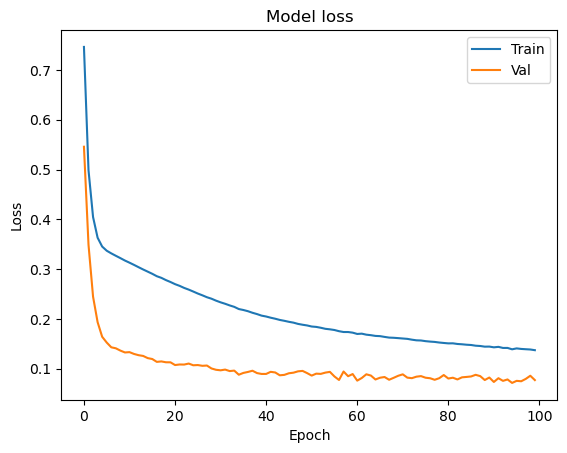

In [179]:
#Now let's visualize the metrics we are evaluating: loss and accuracy
#We need to import matplotlib now
import matplotlib.pyplot as mat

#First we want to visualize the traing loss and the validation loss
mat.plot(hist.history['loss'])
mat.plot(hist.history['val_loss'])
mat.title('Model loss')
mat.ylabel('Loss')
mat.xlabel('Epoch')
mat.legend(['Train', 'Val'], loc='upper right')
mat.show()

#It doesn't seem like our training data is fitting our validation data very well here
#Perhaps there are some changest that can be made
#After some adjustments, I've decided to do 2 hidden layers of 16 neurons with batch_size=4 and epoch=100
#This seems to fit our data better

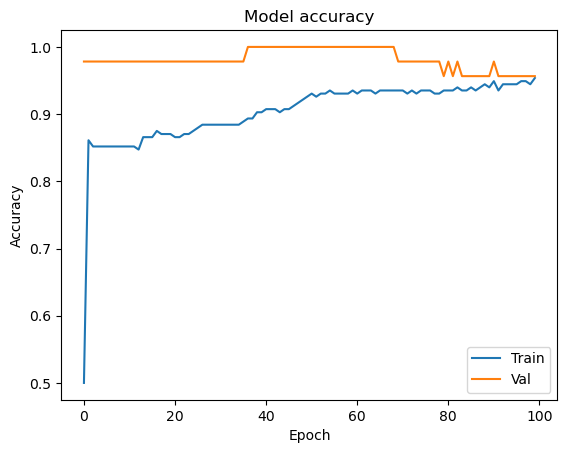

In [180]:
#Secondly we will visualize the training accuracy and the validation accuracy
mat.plot(hist.history['accuracy'])
mat.plot(hist.history['val_accuracy'])
mat.title('Model accuracy')
mat.ylabel('Accuracy')
mat.xlabel('Epoch')
mat.legend(['Train', 'Val'], loc='lower right')
mat.show()

In [ ]:
#This final model has an accuracy of 95.37% and a loss of 0.1370 